In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

# 1. Importing  Data

In [2]:
list1 = pd.read_csv('NY/NYlistings.csv')
list2 = pd.read_csv('NY/NYlistings2.csv')
#nbhd = pd.read_csv('neighbourhoods.csv')
#calendar = pd.read_csv('calendar.csv')
review1 = pd.read_csv('NY/NYreviews.csv')
review2 = pd.read_csv('NY/NYreviews2.csv')
#amenities = pd.read_csv('Cata Feature CSV/amenities.csv')
#Integrate = pd.read_csv('Cata Feature CSV/IntegrateCata.csv')
#reviewlen = pd.read_csv('review_length.csv')
#amenities.shape
#property_type = pd.read_csv('property_type.csv')
#property_type.shape

/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
cata = pd.read_csv('NY/Integrate.csv')

,1,2,3,4,5,6,7,8,9,10,...,177,178,179,180,181,182,183,184,185,186
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0.0,0.0,0,1,0,0,250
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0.0,0.0,1,0,1,0,500
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0.0,0.0,2,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.0,0.0,3,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0.0,0.0,4,1,0,0,800
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0.0,0.0,5,0,1,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0.0,0.0,6,1,0,0,1000
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1.0,1.0,7,0,1,0,100
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0.0,0.0,8,1,0,0,500
9,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0.0,0.0,9,0,1,0,0


#  2. Data Exploratory Analysis

In [3]:
# Join list1 and list2 to create the x vector
X = pd.concat([list1, list2], axis=1)

In [46]:
Z1=X.loc[:, X.dtypes == np.float64] #Extracting columns with values of type float 
Z2=X.loc[:, X.dtypes == np.int64]   #Extracting columns with values of type int
Z3=X.loc[:, X.dtypes == np.object]   #Extracting columns with values of type categorical
X_numeric=pd.concat([Z1,Z2], axis=1)
X_cat = Z3
X_numeric.shape
# X_numeric.head()

(44317, 41)

In [47]:
"""X_numeric has duplicate columns. The code below removes the duplicate columns"""
_, i = np.unique(X_numeric.columns, return_index=True)
X_Num_Cov=X_numeric.iloc[:, i]
#X_Num_Cov.to_csv('NY/NYNumerical_FS.csv')

In [23]:
print(X_Num_Cov.columns.values)

['accommodates' 'availability_30' 'availability_365' 'availability_60'
 'availability_90' 'bathrooms' 'bedrooms' 'beds'
 'calculated_host_listings_count' 'guests_included' 'host_acceptance_rate'
 'host_id' 'host_listings_count' 'host_total_listings_count' 'id'
 'latitude' 'license' 'longitude' 'maximum_nights' 'minimum_nights'
 'number_of_reviews' 'price' 'review_scores_accuracy'
 'review_scores_checkin' 'review_scores_cleanliness'
 'review_scores_communication' 'review_scores_location'
 'review_scores_rating' 'review_scores_value' 'reviews_per_month'
 'scrape_id' 'square_feet']


In [17]:
_, i = np.unique(X_cat.columns, return_index=True)
X_cat=X_cat.iloc[:, i]
# print(X_cat.describe())
# print(X_cat.info())
#X_cat.to_csv('NY/NYCatgorical_FS.csv')

# Creating X and Y for the dataset

In [56]:
for i in range(len(list2["review_scores_rating"])):
    if math.isnan(list2["review_scores_rating"][i]):
        list2["review_scores_rating"][i]=0

In [58]:
list2["review_scores_rating"]

0          0.0
1        100.0
2         95.0
3          0.0
4          0.0
5         97.0
6        100.0
7        100.0
8          0.0
9          0.0
10        97.0
11        99.0
12        87.0
13        98.0
14        91.0
15        95.0
16        90.0
17       100.0
18        93.0
19        96.0
20        94.0
21        89.0
22        88.0
23         0.0
24       100.0
25        98.0
26        92.0
27        96.0
28        96.0
29        87.0
         ...  
44287     90.0
44288     93.0
44289    100.0
44290      0.0
44291      0.0
44292    100.0
44293     97.0
44294      0.0
44295     93.0
44296      0.0
44297      0.0
44298      0.0
44299      0.0
44300      0.0
44301    100.0
44302      0.0
44303      0.0
44304      0.0
44305    100.0
44306      0.0
44307     80.0
44308      0.0
44309      0.0
44310      0.0
44311     80.0
44312    100.0
44313      0.0
44314     87.0
44315      0.0
44316      0.0
Name: review_scores_rating, Length: 44317, dtype: float64

In [59]:
for i in range(len(X_Num_Cov['reviews_per_month'])):
    if math.isnan(X_Num_Cov['reviews_per_month'][i]):
        X_Num_Cov['reviews_per_month'][i]=0

In [60]:
X_select = X_Num_Cov[['reviews_per_month','accommodates','bathrooms','bedrooms','beds','guests_included','latitude','longitude','price']]
X_select['avail'] = list2[['availability_365']]
X_select = pd.concat([X_select, cata], axis=1)

# add review score
X_select = pd.concat([X_select, list2["review_scores_rating"]], axis=1)
#X_select = pd.concat([X_select, reviewlen], axis=1)
X_select = X_select.dropna()
#X_select = X_select[X_select.avail != 0]
Y = X_select['reviews_per_month']
#Y = np.divide(X_select['reviews_per_month'], X_select['avail'])
X_select = X_select.drop(['reviews_per_month'], axis = 1)
# print(X_select.info())
# X_select.columns
# X_select.info(verbose = True, null_counts = True)
X_select.shape

/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(43825, 196)

In [88]:
#X_select.to_csv('NY/X_select.csv', index_col=0)
#Ytext.to_csv('NY/Y.csv')

In [85]:
type(Y)

pandas.core.series.Series

In [86]:
Ytext = pd.concat([pd.Series(['reviews_per_month']), Y])

In [89]:
testx = pd.read_csv('NY/Y.csv',index_col=0)

In [90]:
testx

,reviews_per_month
0,
0,0.00
1,2.00
2,0.77
3,0.00
4,0.00
5,3.27
6,1.58
7,1.49
8,0.00


# Data visulization

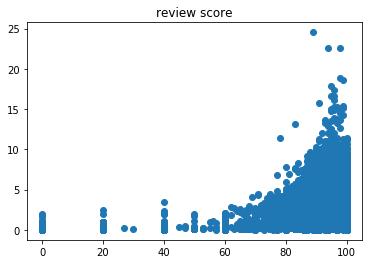

In [49]:
plt.scatter(X_select.review_scores_rating,Y)
plt.title("review score")

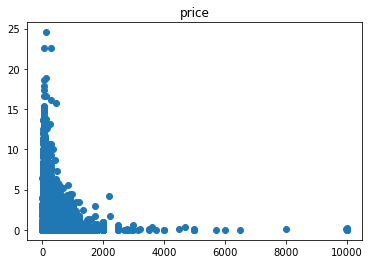

In [29]:
plt.scatter(X_select.price,Y)
plt.title("price")

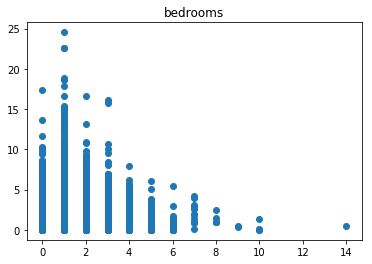

In [30]:
plt.scatter(X_select.bedrooms,Y)
plt.title("bedrooms")

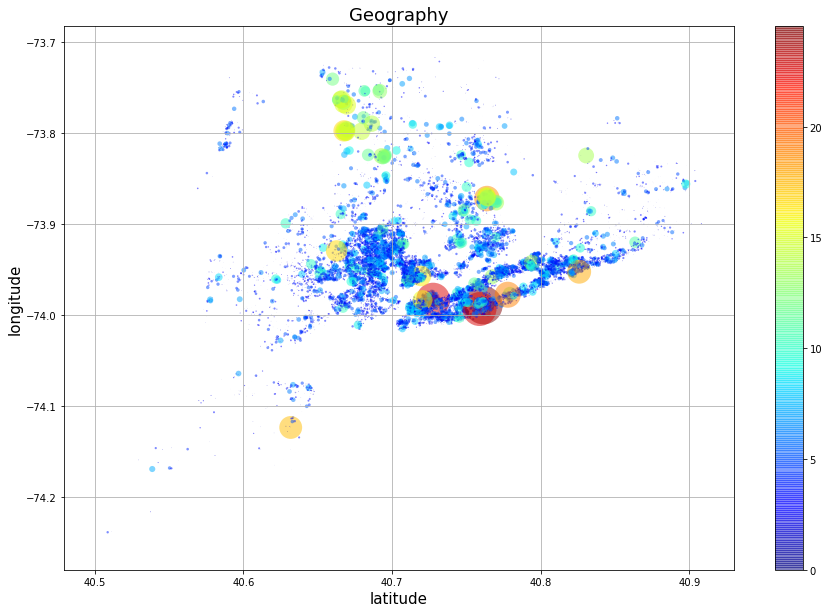

In [44]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
cm = plt.cm.get_cmap('jet')
sc = ax.scatter(X_select['latitude'],X_select['longitude'], s=Y**3/10,c=Y,cmap=cm,linewidth=0,alpha=0.5)
ax.grid()
fig.colorbar(sc)
plt.xlabel('latitude',fontsize=15)
plt.ylabel('longitude',fontsize=15)
plt.title("Geography",fontsize=18)
plt.show()

# Splitting data into training and testing sets

In [62]:
num_test = 0.1
X_train, X_test, y_train, y_test = train_test_split(X_select, Y, test_size=num_test, random_state=23)
y_test=y_test.to_frame()
y_train=y_train.to_frame()

# Learning Curve

In [51]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Ridge Regression with Validation Curve

0.42801814868
0.418005878256


/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.595687409841626e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.5519178115957886e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.189757864765767e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaran

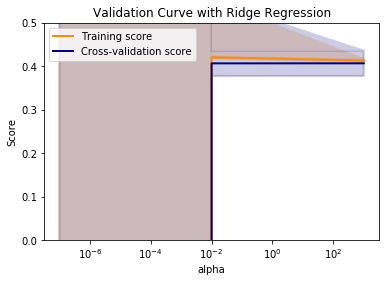

In [63]:
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train) 
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)
print(clf.score(X_test, y_test))
print(clf.score(X_train, y_train))


param_range = np.logspace(-7, 3, 3)
# train_scores, test_scores = validation_curve(
#     Ridge(), X_select, Y, param_name="alpha", param_range=param_range,
#     cv=10, scoring="accuracy", n_jobs=1)
train_scores, test_scores = validation_curve(Ridge(), X_select, Y, "alpha",param_range,cv=10, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 0.5)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [53]:
np.mean(y_train)

reviews_per_month    1.448695
dtype: float64

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(clf.predict(X_train),y_train)**0.5


1.2959962082376224

In [55]:

mean_squared_error(clf.predict(X_test),y_test)**0.5

1.23551085671134

In [38]:
clf.predict(X_train)

array([[ 2.52576123],
       [ 1.14953533],
       [ 1.68666285],
       ..., 
       [ 1.50326498],
       [ 0.46337435],
       [ 1.70889112]])

# Linear Regression

0.427977380114


<module 'matplotlib.pyplot' from '/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

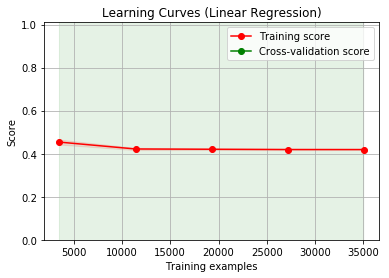

In [39]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))
regr.get_params()
regr.coef_

title = "Learning Curves (Linear Regression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = regr
plot_learning_curve(estimator, title, X_select, Y, (0, 1.01), cv=cv, n_jobs=4)

# Lasso

In [40]:
clf = linear_model.Lasso(alpha=0.0, fit_intercept=True, 
                         normalize=True, precompute=False, copy_X=True, 
                         positive=False, random_state=None,tol=0.001)
clf.fit(X_train, y_train) 
print(clf.score(X_test, y_test))

param_range = np.logspace(-7, 3, 3)
# train_scores, test_scores = validation_curve(
#     Ridge(), X_select, Y, param_name="alpha", param_range=param_range,
#     cv=10, scoring="accuracy", n_jobs=1)
train_scores, test_scores = validation_curve(Lasso(), X_select, Y, "alpha",param_range,cv=10, n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with Lasso Regression")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 0.5)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


0.427973717825


/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


NameError: name 'Lasso' is not defined

# Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)
# print(regr.coef_) 
# print(regr.intercept_) 
# print(regr.predict([[0, 0]])) 
regr.score(X_test, y_test)

# SVR

In [ ]:
from sklearn import svm
clf_svm=svm.SVR(kernel='linear')
clf_svm.fit(X_train,y_train)
clf_svm.score(X_test,y_test)

# Random Forest

In [71]:
# clf = RandomForestClassifier(max_depth=10, random_state=0)
# clf.fit(X_train, y_train)
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=2, max_features='float', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#             oob_score=False, random_state=0, verbose=0, warm_start=False)
# print(clf.feature_importances_)
# Y_pred = clf.predict(X_test)
# clf.score(X_test, y_test)


ValueError: Unknown label type: 'continuous'

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train[['price']], y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
type(X_train)

/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


ValueError: Unknown label type: 'continuous'

In [49]:
# X.describe(include=['O'])

In [50]:
X.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,Townhouse,Loft,Boat,Bed & Breakfast,Other,Dorm,Treehouse,Yurt,Chalet,Tent
0,241032,Stylish Queen Anne Apartment,956883,NaN,Queen Anne,West Queen Anne,47.636289,-122.371025,Entire home/apt,85,...,0,0,0,0,0,0,0,0,0,0
1,953595,Bright & Airy Queen Anne Apartment,5177328,Andrea,Queen Anne,West Queen Anne,47.639123,-122.365666,Entire home/apt,150,...,0,0,0,0,0,0,0,0,0,0
2,3308979,New Modern House-Amazing water view,16708587,NaN,Queen Anne,West Queen Anne,47.629724,-122.369483,Entire home/apt,975,...,0,0,0,0,0,0,0,0,0,0
3,7421966,Queen Anne Chateau,9851441,NaN,Queen Anne,West Queen Anne,47.638473,-122.369279,Entire home/apt,100,...,0,0,0,0,0,0,0,0,0,0
4,278830,Charming craftsman 3 bdm house,1452570,NaN,Queen Anne,West Queen Anne,47.632918,-122.372471,Entire home/apt,450,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Extract the Y vector


In [52]:
print(nbhd.columns.values)
print(nbhd.shape)

['neighbourhood_group' 'neighbourhood']
(90, 2)


In [53]:
print(review1.columns.values)
print(review1.shape)

['listing_id' 'date']
(84849, 2)


In [54]:
print(review2.columns.values)
print(review2.shape)

['listing_id' 'id' 'date' 'reviewer_id' 'reviewer_name' 'comments']
(84849, 6)


In [55]:
print(calendar.columns.values)
print(calendar.shape)
calendar.head()

['listing_id' 'date' 'available' 'price']
(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [ ]:
newlist1= list1.drop(['host_name', 'last_review','host_id','calculated_host_listings_count'], axis=1)
newlist1.head()

In [ ]:
list2['averating'] = list2[["review_scores_checkin", "review_scores_accuracy","review_scores_communication", "review_scores_location","review_scores_value", "review_scores_cleanliness"]].mean(axis=1)
ax = sns.regplot(x="averating", y="review_scores_rating", data=list2)

In [ ]:
yy = pd.DataFrame()
yy['review_scores_rating'] = list2['review_scores_rating']
xx = pd.DataFrame()
xx['host_response_rate'] = list2['host_response_rate']
# print(math.isnan(xx['host_response_rate'][3]))
for i in xrange(xx.shape[0]):
    if isinstance(xx['host_response_rate'][i], basestring):
        xx['host_response_rate'][i] = 1.0*int(xx['host_response_rate'][i][:-1])
combine = pd.concat([xx,yy], axis=1)
combine = combine.dropna()

print(combine.tail)
ax = sns.regplot(x='host_response_rate', y="review_scores_rating", data=combine)# 